In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [58]:
data=pd.read_csv('//home/mric/Téléchargements/test_scores.csv')
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [59]:
data.tail()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


In [60]:
data[data['n_student'] == 14].n_student.describe()

count    28.0
mean     14.0
std       0.0
min      14.0
25%      14.0
50%      14.0
75%      14.0
max      14.0
Name: n_student, dtype: float64

In [61]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


/home/mric/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  for bar in hist_artists:


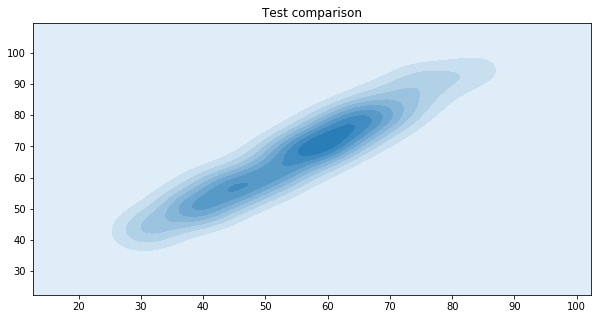

In [63]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data[['pretest','posttest']], shade=True).set_title('Test comparison')
plt.show()

In [64]:
print(sns.__version__)

0.10.0


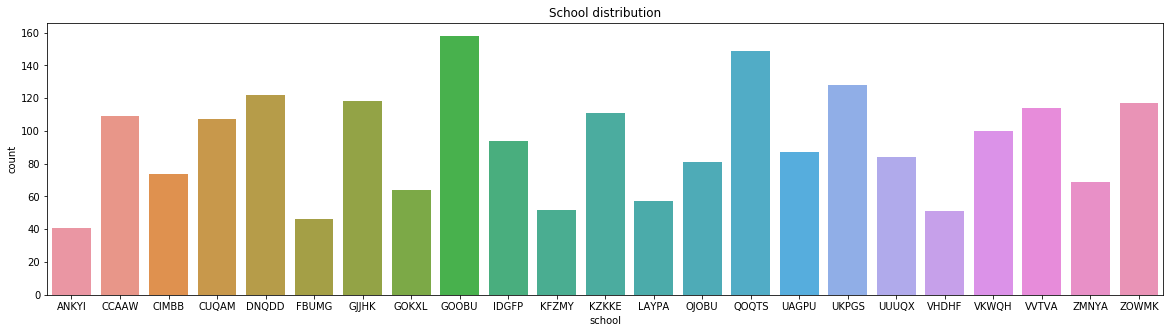

In [65]:

plt.figure(figsize=(20,5))
sns.countplot(x=data['school']).set_title('School distribution')
plt.show()



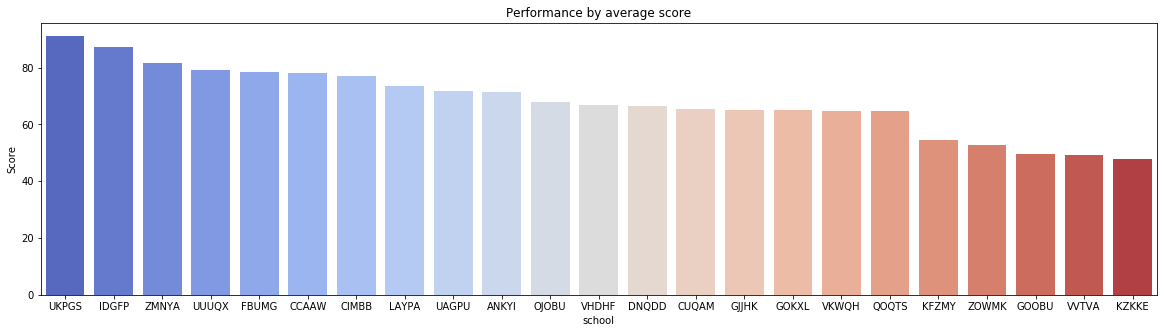

In [66]:
mean = data.groupby('school').mean().sort_values(by='posttest', ascending=False).posttest

plt.figure(figsize=(20,5))
sns.barplot(x=mean.index, y=mean, palette= 'coolwarm').set_title('Performance by average score')
plt.ylabel('Score')
plt.show()

In [67]:
data['school_setting'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

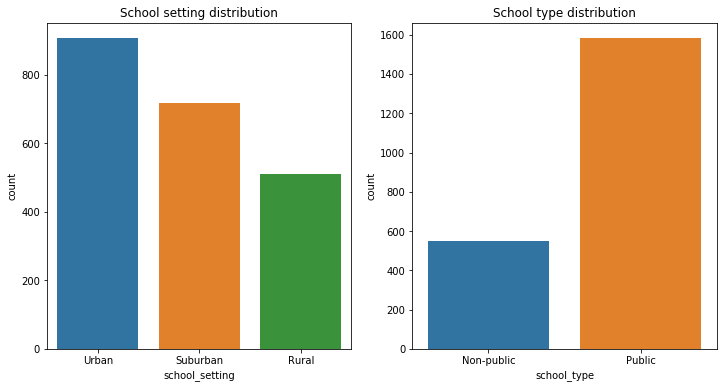

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1 = sns.countplot(x=data['school_setting'], ax=ax1)
ax1.set_title('School setting distribution')

ax2 = sns.countplot(x=data['school_type'], ax=ax2)
ax2.set_title('School type distribution')

plt.show()

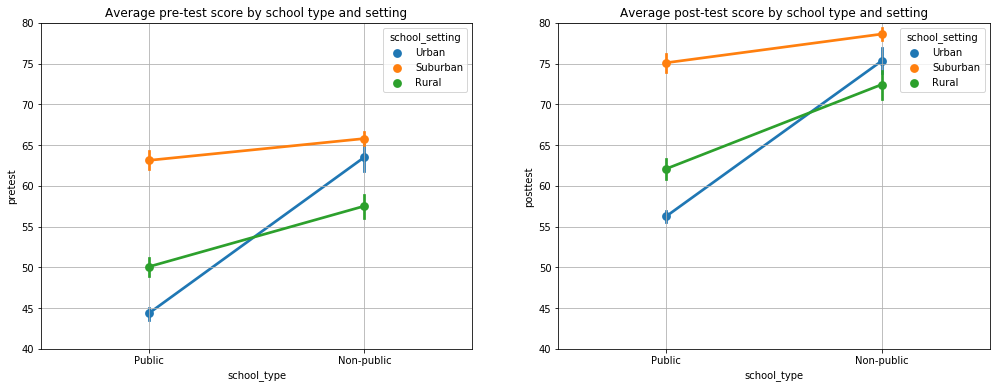

In [69]:

f, ax = plt.subplots(1,2, figsize=(17,6))

sns.pointplot(data=data, x='school_type', y='pretest', hue='school_setting', order=['Public', 'Non-public'], ax=ax[0])
ax[0].set_title('Average pre-test score by school type and setting')
ax[0].set_ylim(ymin=40, ymax=80)

sns.pointplot(data=data, x='school_type', y='posttest', hue='school_setting', order=['Public', 'Non-public'], ax=ax[1])
ax[1].set_title('Average post-test score by school type and setting')
ax[1].set_ylim(ymin=40, ymax=80)

ax[0].grid()
ax[1].grid()
plt.show()



In [70]:
mean = data[['classroom', 'pretest', 'posttest']].groupby('classroom').mean()
mean

,pretest,posttest
classroom,,
05H,72.954545,83.363636
08N,83.761905,93.857143
0N7,44.107143,60.785714
18K,46.451613,56.032258
197,62.285714,77.928571
...,...,...
YTB,32.533333,48.433333
YUC,45.857143,55.761905
ZBH,40.466667,49.766667


In [71]:
mean['increase'] = (mean.posttest - mean.pretest)
mean

,pretest,posttest,increase
classroom,,,
05H,72.954545,83.363636,10.409091
08N,83.761905,93.857143,10.095238
0N7,44.107143,60.785714,16.678571
18K,46.451613,56.032258,9.580645
197,62.285714,77.928571,15.642857
...,...,...,...
YTB,32.533333,48.433333,15.900000
YUC,45.857143,55.761905,9.904762
ZBH,40.466667,49.766667,9.300000


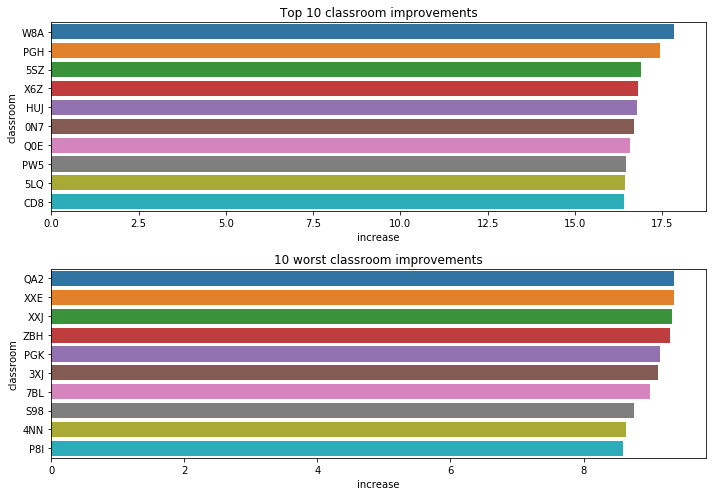

In [72]:
top_10 = mean.sort_values(by='increase', ascending=False).head(10)
worst_10 = mean.sort_values(by='increase', ascending=False).tail(10)

f, ax = plt.subplots(2,1,sharex=True, figsize=(10,7))

plt.subplot(211)
ax[0] = sns.barplot(data=top_10, x='increase', y=top_10.index).set_title('Top 10 classroom improvements')

plt.subplot(212)
ax[1] = sns.barplot(data=worst_10.tail(10), x='increase', y=worst_10.index).set_title('10 worst classroom improvements')

plt.tight_layout()
plt.show()

In [73]:
mean = data.groupby('teaching_method', as_index=False).mean().drop('n_student', axis=1)
mean

,teaching_method,pretest,posttest
0,Experimental,57.055263,72.982895
1,Standard,53.793882,63.847050


In [74]:


table = pd.DataFrame({'teaching_method': ['Experimental', 'Standard', 'Experimental', 'Standard'], 'type': ['pretest', 'pretest', 'posttest', 'posttest'],
             'score': [57.055263, 53.793882, 72.982895, 63.847050]})

table

,teaching_method,type,score
0,Experimental,pretest,57.055263
1,Standard,pretest,53.793882
2,Experimental,posttest,72.982895
3,Standard,posttest,63.847050


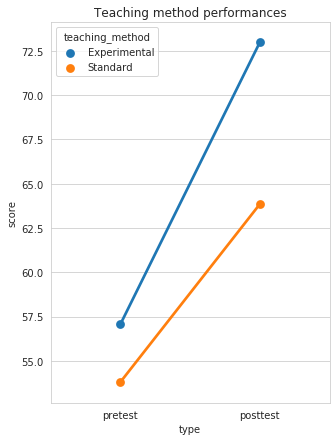

In [75]:
plt.figure(figsize=(5,7))
sns.set_style(style='whitegrid')
sns.pointplot(data=table, x='type', y='score' , hue='teaching_method').set_title('Teaching method performances')
plt.show()

In [76]:
mean = data.groupby('gender').mean()
mean

,n_student,pretest,posttest
gender,,,
Female,22.878788,54.873106,67.004735
Male,22.715877,55.037140,67.197772


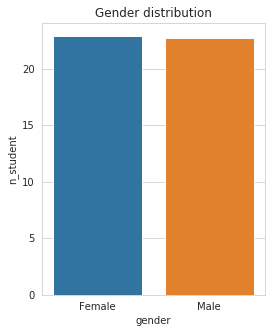

In [77]:
plt.figure(figsize=(4,5))
sns.barplot(data=mean, x=mean.index, y='n_student').set_title('Gender distribution')
plt.show()

In [78]:
data.set_index('student_id', inplace=True)

X = data.drop('posttest', axis=1)
Y = data['posttest']

In [79]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
student_id,,,,,,,,,,
2FHT3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0
3JIVH,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0
3XOWE,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0
556O0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0
74LOE,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0


In [80]:
from sklearn.preprocessing import LabelEncoder

label_variables = ['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']

for col in X[label_variables]:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

lblX = X

X

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest
student_id,,,,,,,,,
2FHT3,0,2,0,22,1,20.0,0,0,62.0
3JIVH,0,2,0,22,1,20.0,0,0,66.0
3XOWE,0,2,0,22,1,20.0,1,0,64.0
556O0,0,2,0,22,1,20.0,0,0,61.0
74LOE,0,2,0,22,1,20.0,1,0,64.0
...,...,...,...,...,...,...,...,...,...
T8LSK,22,2,1,94,1,30.0,0,0,39.0
VNP26,22,2,1,94,1,30.0,0,1,38.0
YDR1Z,22,2,1,94,1,30.0,0,1,45.0


In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = OneHotEncoder()

col_transformer = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,2,3,4,6,7])], remainder='passthrough')

X = col_transformer.fit_transform(X).toarray()

In [82]:
from sklearn.model_selection import train_test_split

tX = X
tY = Y
train_x, test_x, train_y, test_y = train_test_split(tX,tY,test_size=0.2, random_state=1)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1706, 133), (1706,), (427, 133), (427,))

In [83]:
scores = []
maes = []

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_x, train_y)

lrPred = lr.predict(test_x)

pd.DataFrame({'Value': test_y, 'Predict': lrPred.ravel()})

,Value,Predict
student_id,,
H9OAN,48.0,46.970703
TNGPD,70.0,70.064453
T0WEF,49.0,49.046875
N2HZ8,69.0,67.492188
ZDEIJ,40.0,42.509766
...,...,...
EEDA4,58.0,59.650391
F9AF4,90.0,90.173828
MLDXH,94.0,91.986328


In [85]:
s = lr.score(test_x, test_y)
scores.append(s)
s

0.9602138269348418

In [86]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_y, lrPred)
maes.append(mae)
mae


2.2881842798594847

In [87]:
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor()
treeReg.fit(train_x, train_y)
s = treeReg.score(test_x, test_y)
scores.append(s)
s

0.932073620787748

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train_x, train_y)
s = rf.score(test_x, test_y)
scores.append(s)
s

0.9481795933906398

In [89]:


lrPred = rf.predict(test_x)
mae = mean_absolute_error(test_y, lrPred)
maes.append(mae)
mae



2.5713078804489813